<a href="https://colab.research.google.com/github/blackwithwhitegreen/ML-files/blob/main/Assumptions_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [3]:
df

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647
...,...,...,...,...
195,0.255081,-0.231497,-0.239632,38.067836
196,0.276068,-0.648411,-0.077441,12.812755
197,0.122250,-1.157383,0.765721,70.454115
198,-0.914822,-0.897140,-0.784205,-93.235783


In [4]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
residual = y_test - y_pred

#Linear Relationship

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Feature3')

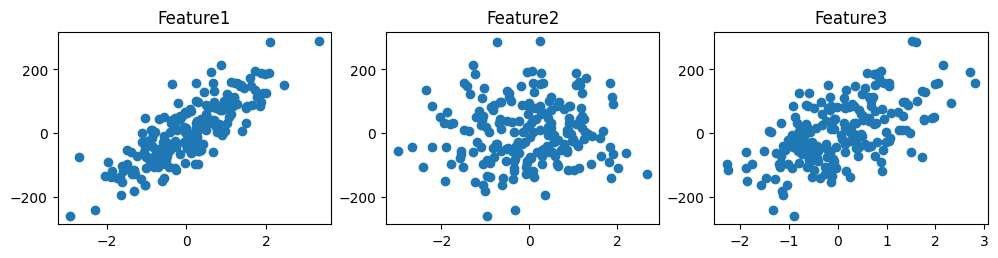

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize = (12,2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = []

for i in range(X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train,i))

In [18]:
pd.DataFrame({'vif':vif},index = df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

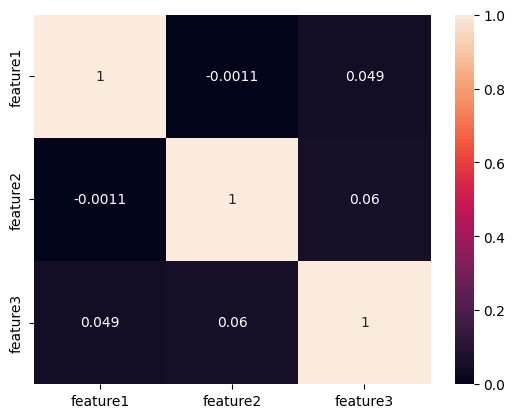

In [19]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

#Normality of Residual

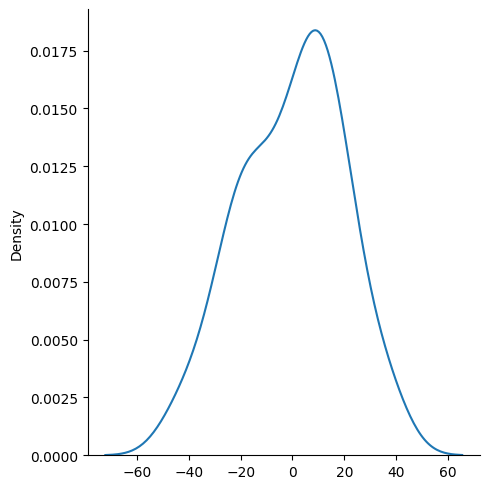

In [20]:
sns.displot(residual,kind='kde')

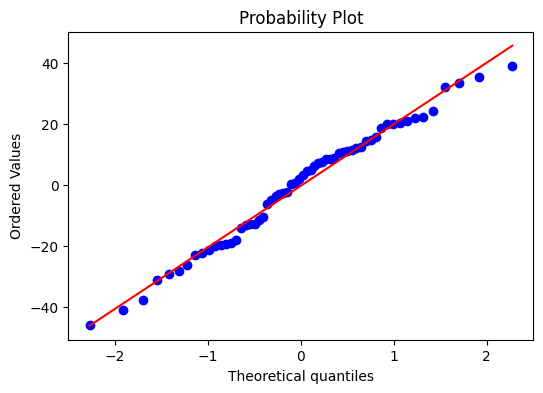

In [21]:
#QQ plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)

plt.show()

#Homescedasticity